___
# <font color=#EEAA11> HW #5: Visualization, IDA and EDA </font>

____

![missing](https://jenslaufer.com/figure/source/2019-02-05-visualize_missing_values_with_ggplot/unnamed-chunk-13-1.png)

## <font color=#00BBFF> Problem #1 IDA (10 pts) </font>

In this problem you are going to explore IDA: Initial Data Analysis, which is can be defined many ways, but we will assume it contains these steps:
* Data collection and importation
* Data cleaning and preprocessing
* Variable identification and classification
* Basic descriptive statistics
* Data quality assessment
* Missing data analysis
* Outlier detection

🤓 Follow these steps:
* import the planets dataset, which is in Seaborn
    - in this case, the data has been collected for us and you simply need to import it into a Pandas dataframe
* based on your initial assessment of this dataset, how should it be cleaned and processed? discuss your observations in a markdown cell and write the code to complete this task
* what types of variables are there? ordinal? categorical? cardinal? add this to your discussion in the markdown cell
* find the statistics of the different features of the data; what simple methods are in Pandas are there for this? are there variables for which this doesn't make sense? do any of them need to be encoded? 
* based on what you see so far, what is the quality of this data? basic IDA for this might include using `.describe` and `.info` 
* did you note any missing data? make a heat map of this dataset that shows missing values (I have given an example code for this in the past, but feel free to write your own); 
* for each feature/column for which it makes sense, scale the column using the z-score and print the number of outliers for that column (that is, how many rows in the column have values $<-3$ or $>3$ after scaling?)



These IDA steps have already revealed important properties of this dataset. You will want to follow these steps for your project and document what you found. A nice feature of a web app is to have a tab, perhaps called "Dataset(s)", that describes the dataset(s) used for the app. 
____

Next, let's examine EDA, which follows the IDA steps. Let's summarize IDA in a table and compare to EDA:

| Phase | Step | Key Activities |
|-------|------|----------------|
| IDA | 1. Data collection and importation | - Gather data from various sources<br>- Import data into analysis environment (e.g., Python, R) |
| IDA | 2. Data cleaning and preprocessing | - Handle missing values<br>- Remove duplicates<br>- Correct data types<br>- Standardize formats |
| IDA | 3. Variable identification and classification | - Identify dependent and independent variables<br>- Classify variables (numeric, categorical, etc.)<br>- Understand the meaning of each variable |
| IDA | 4. Basic descriptive statistics | - Calculate mean, median, mode<br>- Determine range, variance, standard deviation<br>- Identify minimum and maximum values |
| IDA | 5. Data quality assessment | - Check for inconsistencies<br>- Verify data accuracy<br>- Assess data completeness |
| IDA | 6. Missing data analysis | - Quantify missing data<br>- Identify patterns in missing data<br>- Decide on imputation strategy if necessary |
| IDA | 7. Outlier detection | - Identify potential outliers<br>- Assess impact of outliers<br>- Decide on treatment of outliers |
| EDA | 1. Univariate analysis | - Create histograms, box plots for numeric variables<br>- Generate bar charts for categorical variables<br>- Calculate summary statistics |
| EDA | 2. Bivariate analysis | - Create scatter plots<br>- Perform cross-tabulations<br>- Calculate correlations between pairs of variables |
| EDA | 3. Multivariate analysis | - Use dimensionality reduction techniques (e.g., PCA)<br>- Create pair plots or correlation matrices<br>- Explore interactions between multiple variables |
| EDA | 4. Correlation analysis | - Calculate correlation coefficients<br>- Create correlation heatmaps<br>- Identify strongly correlated variables |
| EDA | 5. Dimensionality assessment | - Evaluate number of features vs. observations<br>- Consider feature selection or extraction methods<br>- Assess impact of high dimensionality on analysis |
| EDA | 6. Pattern and trend identification | - Look for temporal trends in time series data<br>- Identify seasonal patterns<br>- Detect clusters or groupings in the data |
| EDA | 7. Hypothesis generation | - Formulate potential relationships between variables<br>- Develop questions for further investigation<br>- Identify areas for more detailed statistical analysis |

Note: The boundary between IDA and EDA can be fluid, and some activities may overlap or be performed iteratively throughout the analysis process.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import zscore
import numpy as np

* based on your initial assessment of this dataset, how should it be cleaned and processed? discuss your observations in a markdown cell and write the code to complete this task
    - **There are several quantitative variables that have very different units (mass, orbital_period, distance), they should be z-scaled.** 
* what types of variables are there? ordinal? categorical? cardinal? add this to your discussion in the markdown cell
    - **Several numeric. "method": nominal, "number": unknown ?? I went to the seaborn docs on github and followed the link  to NASA website but it still remains a little elusive what exactly "number" means. think it is some sort of cardinal count**
* find the statistics of the different features of the data; what simple methods are in Pandas are there for this? are there variables for which this doesn't make sense? do any of them need to be encoded? 
    - **.describe and .info. It might be a good idea to encode the "method" column depending on your purposes but I don't think it is necessary for IDA and EDA.**
* based on what you see so far, what is the quality of this data? basic IDA for this might include using `.describe` and `.info` 
    - **There is a significant amount of missing data for some variables. "year" and "number" have no missing values. "mass" is missing for almost half of the samples.**
* did you note any missing data? make a heat map of this dataset that shows missing values (I have given an example code for this in the past, but feel free to write your own); 
    - **Yes, missing data for "period", "mass", and "distance".** 
* for each feature/column for which it makes sense, scale the column using the z-score and print the number of outliers for that column (that is, how many rows in the column have values $<-3$ or $>3$ after scaling?)
    - **orbital_period outlier count: 6
mass outlier count: 14
distance outlier count: 8**

In [2]:
df_planets = sns.load_dataset('planets')
print(df_planets.info())
print(df_planets.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
            number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.000000        0.090706    0.003600     1.350000  1989.000000
25%       1.000000        5.442540    0.229000    32.560000  2007.000000
50%       1.000000       39.

orbital_period outlier count: 6
mass outlier count: 14
distance outlier count: 8


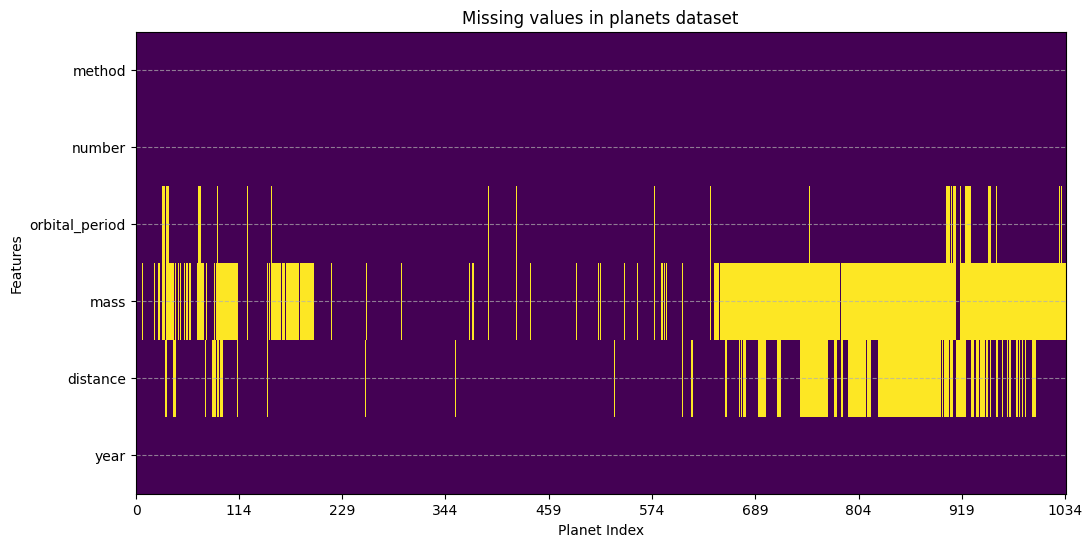

In [13]:
# create heatmaps of missing
# create a boolean mask: True for NaN, False for finite values
nan_mask = df_planets.isna()
# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()
# size the plot
plt.figure(figsize=(12, 6))
# imshow with interpolation set to 'nearest' and aspect to 'auto'
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')
plt.xlabel('Planet Index')
plt.ylabel('Features')
plt.title('Missing values in planets dataset')
# y-axis tick labels to feature names
plt.yticks(range(len(df_planets.columns)), df_planets.columns)
# x-axis ticks
num_planets = nan_array.shape[0]
plt.xticks(np.linspace(0, num_planets-1, min(10, num_planets)).astype(int))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# to scale factors with sklearn zscore need to handle missing values first or it will propigate
df_planets_sub = df_planets.dropna()

# scale numeric variables
numeric_cols = df_planets_sub.select_dtypes(include=[np.float64]).columns
df_planets_scale = df_planets_sub[numeric_cols].apply(zscore)
# add other cols back
df_planets_scale[['year', 'method', 'number']] = df_planets[['year', 'method', 'number']]

# count the number of outliers, |z| > 3
for c in numeric_cols:
    count = df_planets_scale[df_planets_scale[c].abs() > 3].shape[0]
    print("{} outlier count: {}".format(c, count))

____

## <font color=#00BBFF> Problem #2 EDA (10 pts) </font>

In this problem you are going to explore EDA: Exploratory Data Analysis, which - _like IDA_ - is can be defined many ways, but we will assume it contains these steps:
* Univariate analysis
* Bivariate analysis
* Multivariate analysis
* Correlation analysis
* Dimensionality assessment
* Pattern and trend identification
* Hypothesis generation

Note that IDA did not involve much in the way of visualization; EDA relies heavily on visualization. An important aspect of EDA is that is, as in the name, exploratory. The goals of EDA might be:
* you have a unique dataset and you want to explore whether it contains anything that would be useful or surprising.
* you have a very specific goal in mind already and you want to explore whether this dataset can help you achieve your goal. 

Because this is EDA, with an emphasis on the E, I want you to explore this dataset with little guidance. Use your curiosity, intuition and creativity. 

🤓 Follow these steps:
* only use the Plotly library for this problem, with as many plot types as you can; interactive plots are preferred
* make about one plot per category above - if you are not familiar with a concept, skip that item (e.g., you don't know what PCA is, you have no idea how to do clustering, there are temporal trends, or whatever); shoot for about 5 plots
* but, complete 7: the EDA must lead to something to do next!! use a markdown cell for this
 

In [16]:
import plotly.express as px

# univariate
fig = px.histogram(df_planets_scale, x = 'mass')
fig.show()

In [37]:
# bivariate
fig = px.scatter(df_planets_scale, x = 'distance', y = 'mass')
fig.show()

In [26]:
#multivariate
fig = px.parallel_coordinates(df_planets_scale)
fig.show()

In [35]:
# dimensionality assessment
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca_res = pca.fit_transform(df_planets_scale[numeric_cols])
df_pca = pd.DataFrame(data=pca_res, columns=['PC1', 'PC2', 'PC3'])

# plot
fig = px.scatter(df_pca, x='PC1', y='PC2', title='PCA of DataFrame', 
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 color= df_planets_scale['method'])
fig.show()

### Hypothesis 
 - Interpreting the data was a little difficult because of some missing values and not being able to track down what "number"means. An interesting observation is that the radial velocity method samples produced the data without missing values for measurements. This may say that this method is produces more data than others. This fact shoudl also be considered if a data scientist descides to impute missing data collected by other methods.


____

![busted](https://i.ytimg.com/vi/AFhhWRxZF9Y/maxresdefault.jpg)

## <font color=#00BBFF> Problem #3 Textbook Chapter 4 (10 pts) </font>

Read chapter 4 of your textbook. 

The _10,000 Hour Rule_ is very famous and it promises to guide you to becoming an expert on anything you wish to pursue. Worth knowing!

Summarize in a markdown cell what went wrong in previous descriptions by other authors; why do the authors of your textbook feel this rule has been miscommunicated to the public? How was the data mis-used? How does this issue connect with the topic of the chapter "correlation requires variation"? What does than mean exactly? 

### The 10000 Hour Rule:
 - If you only look at instances when a phenomenon occured then you cannot assess a correlation because you have no variation from instances when the phenomenon did not occur. The authos of thinking clearly with data believe the 10,000 hour rule has been miscommunicated because the rule violates the notion of having variation along the independent variable. That is to say we can see the original study describes a lot what high achievers do but it does not describe what non-high achievers do. 

____

![color](https://miro.medium.com/v2/resize:fit:800/0*-t4uEHHRgeJ8w-wx.png))

## <font color=#00BBFF> Problem #4 Understanding Color (10 pts) </font>

Watch this video. In a markdown cell, summarize the video in 200-300 words. 



### Summary -
 - Some color maps can distort data. Color maps should be colorful, mpretty, sequential, accurately represent data in black and white and for different color blindness levels. There is not a 1 to 1 mapping of the light that reaches the eye ball and the light that is percevied because the brain does like a sort of normalization for bright and dark environments. Blue yellow color axis is prefered to red green. The virids color scheme is designed to be perceptionally uniform across the scale and it is named after a snake. 

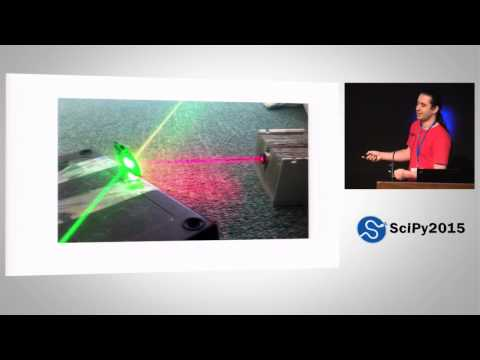

In [39]:
from IPython.display import YouTubeVideo
video_id = "xAoljeRJ3lU"
YouTubeVideo(video_id, width=560, height=315)

____

![bokeh](https://bokeh.org/img/apps.gif)

## <font color=#00BBFF> Problem #5 The Bokeh Library (10 pts) </font>

This week we are covering many visualization libraries. In this homework you will learn a bit about Bokeh. Your tasks are:
* comment every line of the code given below,
* read a bit of [this web page](https://docs.bokeh.org/en/latest/docs/reference/bokeh.html), ([this](https://docs.bokeh.org/en/latest/docs/gallery.html) might also be useful)
* in a markdown cell, describe what is unique about Bokeh and when you would, or would not, use it.


In [5]:

# submodules from plotting figure and show always needed
from bokeh.plotting import figure, show
# submodules notebook required for jupyter notebook
from bokeh.io import output_notebook
# hover tool is like tooltips from altair, interactive scanning
from bokeh.models import HoverTool
import random
import numpy as np

# ensure modules load
output_notebook()

# create some fake data
num_students = 50
# reliably make random data with seed
np.random.seed(42)  
# create a normal unfirom distribution from 150 to 190 for 50 students
heights = np.random.uniform(150, 190, num_students)  # in cm
# same but for weight
weights = np.random.uniform(45, 100, num_students)  # in kg

# plot attributes
p = figure(title="Student Heights vs Weights", x_axis_label="Height (cm)", y_axis_label="Weight (kg)",
           width=600, height=400)

# actual plot
scatter = p.circle(heights, weights, size=10, color="navy", alpha=0.5)

# format hover output
hover = HoverTool(tooltips=[("Height", "@x{0.2f} cm"), ("Weight", "@y{0.2f} kg")])
p.add_tools(hover)

# regress height on weight to make trend line
slope, intercept = np.polyfit(heights, weights, 1)
# define x coord of line
line_x = np.array([min(heights), max(heights)])
# define y coord
line_y = slope * line_x + intercept
#plot line
p.line(line_x, line_y, color="red", line_width=2, legend_label="Trend Line")


# formatting labels
p.title.text_font_size = "16pt"
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.legend.click_policy = "hide"

# have to call show
show(p)

Loading BokehJS ...

### Bokeh summary:
 - Bokeh appears to be a powerful library for creating interactive visualizations. In the docs they seem to mentiond JavaScript -powered graphs without writing JavaScript. I'm not sure how good that is as a selling point. As a beginer the syntax seems a bit verbose for my needs. I think plotly has a nice balance between creating nice interactive plots and also having a simple syntax.